# 4.2. Top2Vec

## Additional Resources and References

Code and Examples

* Sample code for [topic extraction in Scikit-Learn](https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html).
* Documentation for LDA using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html) documentation.
* Examples for using [Top2Vec on ReadtheDocs](https://top2vec.readthedocs.io/en/latest/).
* Youtube Video on Top2Vec by the [Python Tutorials for Digital Humanities](https://www.youtube.com/watch?v=bEaxKSQ4Av8) channel.

Papers

* ["Latent Dirichlet Allocation"](https://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf) by Blei, Ng, and Jordan (2003).
* ["Top2Vec: Distributed Representations of Topics"](https://arxiv.org/abs/2008.09470) by Angelov (2020).

In [ ]:
# Import standard data and visualization libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import the Top2Vec
# This also requires installation on Colaboratory, as it's not pre-installed (😢)
!pip install top2vec[sentence_encoders]
from top2vec import Top2Vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 48.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 52.7 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.1 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039286 sha256=3b87abb072969e80dafa25a0b0cee067aca54faf313d297a8001536ff7b6134a
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=4961106a88337ef45cd

In [ ]:
# Import standard data and visualization libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import the LDA items from scikit-learn
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import *


Load in the Netflix dataset

In [ ]:
#dataset = pd.read_csv("https://raw.githubusercontent.com/Greg-Hallenbeck/class-datasets/main/datasets/netflix.csv")
dataset = pd.read_csv("https://raw.githubusercontent.com/Greg-Hallenbeck/class-datasets/main/datasets/tripadvisor_hotel_reviews.csv")

dataset.head(5)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


## Top2Vec

There's a nice overview of how Top2Vec works on its [ReadtheDocs website](https://top2vec.readthedocs.io/en/latest/Top2Vec.html#how-does-it-work), which I'll talk about in the lecture.

## Worked Example with Top2Vec

In [ ]:
# Fit a model on the documents

documents = list(dataset["Review"])
model = Top2Vec(documents, embedding_model='universal-sentence-encoder')

2024-02-27 15:35:20,393 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2024-02-27 15:35:30,510 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2024-02-27 15:35:39,193 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-02-27 15:36:00,218 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2024-02-27 15:36:21,270 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-02-27 15:36:27,938 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [ ]:
# Top2Vec has opinions about how many topics there should be. What does it think?
model.get_num_topics()

17

In [ ]:
# How many documents are in each topic?
# (Automatically numbered from largest to smallest)
topic_sizes, topic_nums = model.get_topic_sizes()
topic_sizes

array([4073, 3806, 2367, 2232, 1621, 1149,  905,  895,  860,  697,  529,
        329,  288,  236,  194,  184,  126])

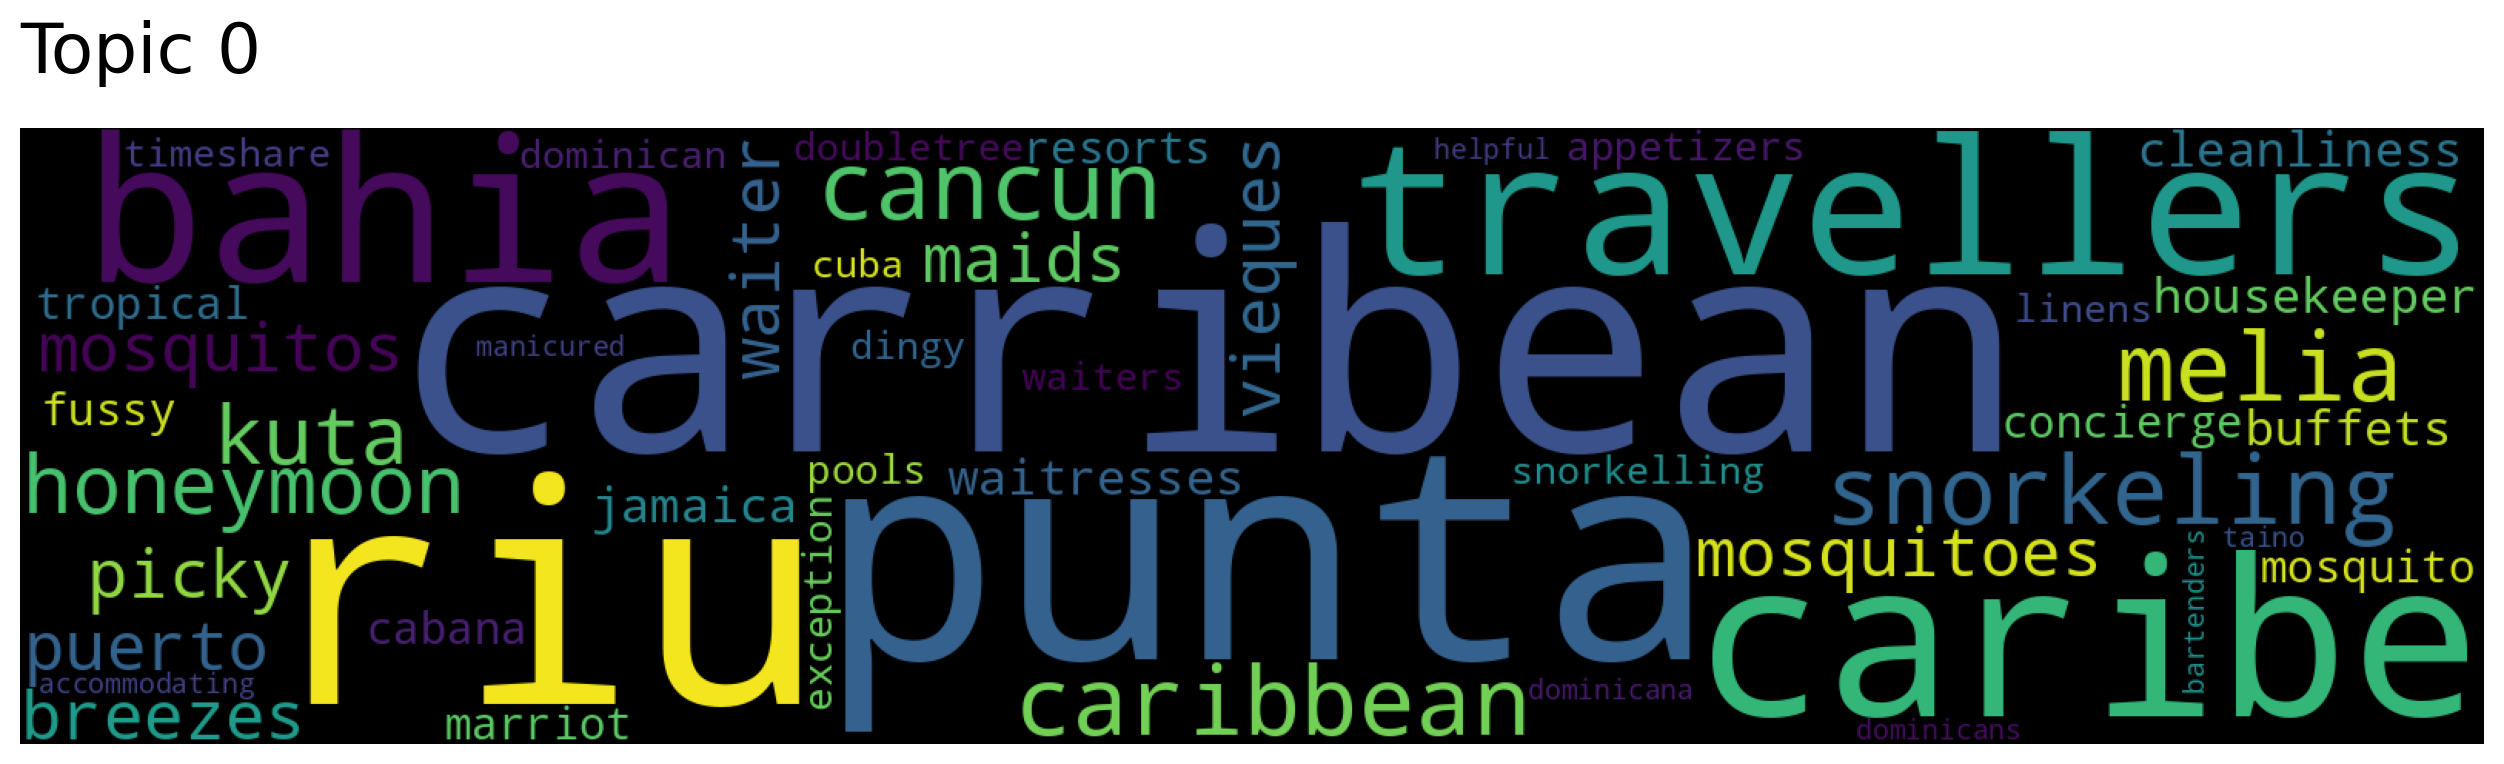

In [ ]:
# Create a word cloud for topic #0. So pretty!
model.generate_topic_wordcloud(0)

In [ ]:
# Alternatively, just print the words out. It's a bit faster
topic_words, word_scores, topic_nums = model.get_topics(17)
topic_num = 0
pd.DataFrame(topic_words[topic_num],word_scores[topic_num])
#topic_words[0]

,0
0.275560,riu
0.248961,carribean
0.226092,punta
0.220388,caribe
0.207298,bahia
0.206619,travellers
0.202301,snorkeling
0.200039,cancun
0.193553,caribbean
0.191216,melia


In [ ]:
# Search the topics to find one that's similar to a keyword or keywords of your choie.
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["awful"], num_topics=5)
topic_nums #shows the topics with stuff most similar

array([4, 3, 2, 0, 8])

In [ ]:
# What are the words most like these topics?
topic_words

[array(['housekeeper', 'housekeeping', 'linens', 'stayed', 'maids',
        'cleanliness', 'marriot', 'concierge', 'complaints', 'complaint',
        'booked', 'suitcases', 'renovations', 'maid', 'inconvenience',
        'apologetic', 'bathroom', 'doorman', 'tidy', 'spotless',
        'elevators', 'bedroom', 'rude', 'room', 'receptionists', 'towels',
        'staffs', 'palapas', 'unhelpful', 'bed', 'noisy', 'accommodating',
        'woken', 'arranged', 'toiletries', 'upstairs', 'laundry',
        'bedding', 'hotwire', 'complained', 'travellers', 'garbage',
        'organized', 'valuables', 'hyatt', 'dingy', 'ritz', 'earplugs',
        'organised', 'terrible'], dtype='<U15'),
 array(['stayed', 'decent', 'helpful', 'hyatt', 'westin', 'concierge',
        'marriot', 'doubletree', 'staffs', 'cleanliness', 'housekeeper',
        'housekeeping', 'radisson', 'reccommend', 'tidy', 'recommend',
        'recommendation', 'recommending', 'unhelpful', 'excellant',
        'nicest', 'reliable', 'ex

In [ ]:
# What topic numbers correspond to that keyword?
topic_nums

array([[2, 1, 6, 9, 4]])

In [ ]:
# Find documents with some topic number.
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=11, num_docs=5)

In [ ]:
# Print out those documents.
documents

array(["great value hotel radisson plaza sydney well-located cbd activities, impressed high quality facilities notch service outstanding restaurants.great things superb cbd activities business travellers love tourists located close major sights shopping perfect night town.-the hotel sydney best restaurants bilson leave gobsmacked, bistro fax pretty good well.-rooms clean new comfortable big, bathrooms fantastic albeit quite small things courteous relaxed perfect australian hospitality.-hotel good value money does n't charge astronomical rates sydney 5 star hotels despite just good.-breakfast served plaza lounge really nice quiet good service wide variety food, worth paying extra access lounge.not-so-good things views not place, sydney beautiful city harbour magic radisson plaza does n't views, overally good hotel, not wrong business trip/holiday/night hotel,  ",
       'fantastic, location, just spent weekend radisson suites sydney, girls weekend away wanted near, great location, walke

In [ ]:
# Get the topics related to a particular document (in this case, I've asked for the top 5 topics related to document #0)
topic_nums, topic_scores, topic_words, word_scores = model.get_documents_topics([0], num_topics=5)
topic_nums
# topic_nums = the names of the topics
# topic_scores = score (0-1 cosine similarity) of how close each topic is to the document
# topic_words = words associated with those topics (as you've seen above)

NameError: name 'model' is not defined